In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os

# путь к весам
MODEL_PATH = "../models/best.pt"
VAL_DIR = "../out/data/images/val"

model = YOLO(MODEL_PATH)

print("Модель загружена из:", MODEL_PATH)
print("Количество файлов в val:", len(os.listdir(VAL_DIR)))


Модель загружена из: ../models/best.pt
Количество файлов в val: 77


In [2]:
def show_detection(image_path, conf=0.05, imgsz=640):
    print("Картинка:", image_path)
    results = model.predict(source=image_path, conf=conf, imgsz=imgsz)
    r = results[0]
    
    plotted = r.plot()  # BGR
    plotted_rgb = cv2.cvtColor(plotted, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(plotted_rgb)
    plt.axis("off")
    plt.title(f"Detections: {len(r.boxes)}")
    plt.show()


Картинка: ../out/data/images/val/20200220_164342.jpg

image 1/1 /Users/talabaev/Desktop/bottle-detector/notebooks/../out/data/images/val/20200220_164342.jpg: 640x480 4 bottles, 61.4ms
Speed: 9.7ms preprocess, 61.4ms inference, 7.3ms postprocess per image at shape (1, 3, 640, 480)


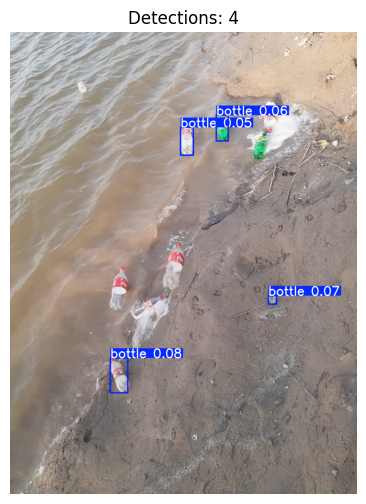

Картинка: ../out/data/images/val/20200220_164352.jpg

image 1/1 /Users/talabaev/Desktop/bottle-detector/notebooks/../out/data/images/val/20200220_164352.jpg: 640x384 3 bottles, 35.6ms
Speed: 3.2ms preprocess, 35.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)


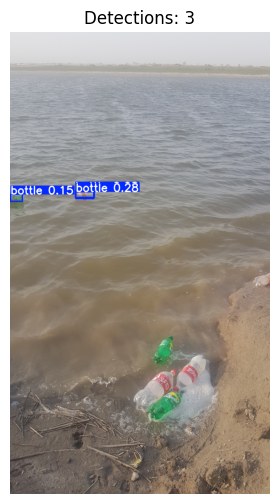

Картинка: ../out/data/images/val/20200220_164405.jpg

image 1/1 /Users/talabaev/Desktop/bottle-detector/notebooks/../out/data/images/val/20200220_164405.jpg: 640x384 5 bottles, 36.8ms
Speed: 2.7ms preprocess, 36.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)


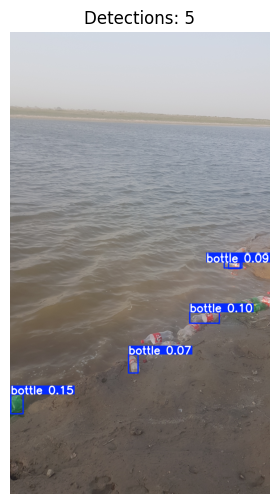

Картинка: ../out/data/images/val/20200220_164411.jpg

image 1/1 /Users/talabaev/Desktop/bottle-detector/notebooks/../out/data/images/val/20200220_164411.jpg: 480x640 8 bottles, 50.2ms
Speed: 3.6ms preprocess, 50.2ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


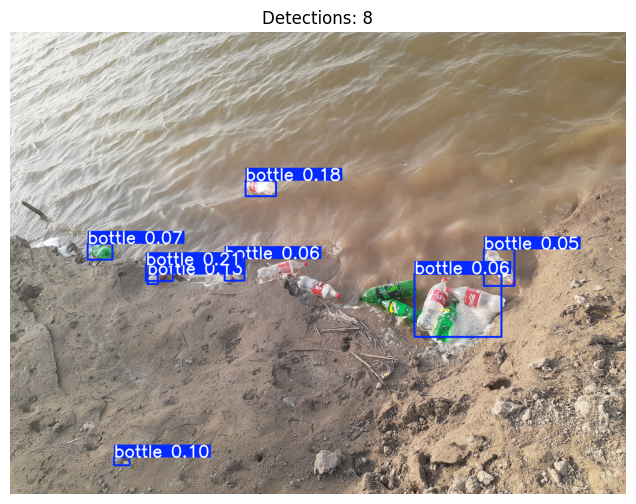

In [3]:
images = sorted(os.listdir(VAL_DIR))[:4]  # первые 4 картинки

for name in images:
    path = os.path.join(VAL_DIR, name)
    show_detection(path, conf=0.05, imgsz=640)


In [4]:
from statistics import mean

counts = []

for name in images:
    path = os.path.join(VAL_DIR, name)
    results = model.predict(source=path, conf=0.01, imgsz=640, verbose=False)
    r = results[0]
    counts.append(len(r.boxes))

print("Картинок для анализа:", len(images))
print("Число детекций по картинкам:", counts)
print("Среднее число бутылок на картинку:", mean(counts) if counts else 0)
print("Максимум бутылок на одной картинке:", max(counts) if counts else 0)


Картинок для анализа: 4
Число детекций по картинкам: [35, 10, 28, 36]
Среднее число бутылок на картинку: 27.25
Максимум бутылок на одной картинке: 36
